In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import arviz as az
import numpy as np

In [8]:
flows = pd.read_csv(r"..\..\UK-wood-mfa\build\flows.csv")
flows_obs= pd.read_csv(r'..\..\UK-wood-mfa\build\flows_obs.csv')
Observations = pd.read_excel(r"..\..\UK-wood-mfa\data\observations_with_references.xlsx")
flows_name = pd.read_excel(r'..\..\UK-wood-mfa\lists\flows_name.xlsx')
products_consumption = pd.read_excel(r'..\..\UK-wood-mfa\data_analysis\finished_products_consumption.xlsx')
products_consumption = products_consumption.set_index(['target'])



In [9]:
flows_name = list(flows_name.to_records())
flows_obs_list = list(flows_obs.to_records())

In [10]:
link = 'http://ukfires.org/analyses/UK-wood/system/'
Consumption = 'Consumption'

In [11]:
#UK consumption of finished products
link = 'http://ukfires.org/analyses/UK-wood/system/'
consumed_products = []
for flow in flows_name:
            consumption_flow_products = flows.loc[(flows['material'] == flow[3]) 
                                       & (flows['source'] == flow[1])
                                       & (flows['target'] == flow[2])]
            if (
                 ((link + 'PalletsManufacturing') in flow[2])
                or ((link + 'RefurbishedPalletsManufacturing' ) in flow[2])
                 ):
                    if ((('exports') not in flow[2])
                        and (('imports') not in flow[1])
                      
                        ):
                      
                                                            
                                        consumption_flow_products = consumption_flow_products.set_index("source")
                          
                                        

                                        consumption_products_renamed= consumption_flow_products.rename(index={
                                                                                                              
                                                              #  link + 'SoftwoodSawnwood' : 'Sawnwood',
                                                              #  link + 'HardwoodSawnwood': 'Sawnwood',
                                                               # link + 'Particleboard': 'Plywood',
                                                             #    link + 'RecycledWoodFibreToPallets': 'RecycledWoodFibre',
                                                            
                                                                link + 'SoftwoodSawnwood' : 'Virgin',
                                                                link + 'HardwoodSawnwood': 'Virgin',
                                                                link + 'Particleboard': 'Virginl',
                                                                 link + 'RecycledWoodFibreToPallets': 'Recycled', })
                                                                
                                        consumed_products.append(consumption_products_renamed)
                                        

                   
consumed_products = pd.concat(consumed_products)  


#print(consumed_products)                        
#consumed_products = pd.DataFrame(consumed_products, columns= [ "source", "target", "material", "value", "sample"])
consumed_products = consumed_products.groupby(['source','sample']).sum()
consumed_products = consumed_products.reset_index(level='sample')
consumed_products= consumed_products.reset_index(level='source')
consumed_products.to_clipboard()
consumed_products['value']=consumed_products['value'] / 1000000000 * 1/4
consumed_products

C:\Users\rla44\AppData\Local\Temp\ipykernel_4564\1714798968.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products = consumed_products.groupby(['source','sample']).sum()


,source,sample,value,quantity
0,Recycled,0,0.751989,3.007955e+09
1,Recycled,1,0.579448,2.317792e+09
2,Recycled,2,0.458591,1.834363e+09
3,Recycled,3,0.703091,2.812363e+09
4,Recycled,4,0.705238,2.820950e+09
...,...,...,...,...
2995,Virginl,995,0.081672,3.266898e+08
2996,Virginl,996,0.103242,4.129698e+08
2997,Virginl,997,0.128595,5.143793e+08
2998,Virginl,998,0.099407,3.976264e+08


In [12]:
consumed_products_total = consumed_products.groupby(['sample']).sum()
consumed_products_total = consumed_products_total.reset_index(level='sample')
consumed_products_total['source_2'] = 'Total'
consumed_products_total 

C:\Users\rla44\AppData\Local\Temp\ipykernel_4564\3536856052.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products_total = consumed_products.groupby(['sample']).sum()


,sample,value,quantity,source_2
0,0,1.381081,5.524322e+09,Total
1,1,1.401741,5.606963e+09,Total
2,2,1.167154,4.668616e+09,Total
3,3,1.323138,5.292552e+09,Total
4,4,1.277689,5.110758e+09,Total
...,...,...,...,...
995,995,1.241766,4.967063e+09,Total
996,996,1.140429,4.561718e+09,Total
997,997,1.314044,5.256175e+09,Total
998,998,1.368419,5.473675e+09,Total


In [13]:
recycled_df = consumed_products[consumed_products['source'] == 'Recycled']
virgin_df = consumed_products[consumed_products['source'] == 'Virgin']
recycled_df

,source,sample,value,quantity
0,Recycled,0,0.751989,3.007955e+09
1,Recycled,1,0.579448,2.317792e+09
2,Recycled,2,0.458591,1.834363e+09
3,Recycled,3,0.703091,2.812363e+09
4,Recycled,4,0.705238,2.820950e+09
...,...,...,...,...
995,Recycled,995,0.687597,2.750386e+09
996,Recycled,996,0.611914,2.447658e+09
997,Recycled,997,0.658978,2.635910e+09
998,Recycled,998,0.762508,3.050034e+09


In [14]:
recycled_df_2 =pd.merge(recycled_df, consumed_products_total , on='sample')
recycled_df_2 

,source,sample,value_x,quantity_x,value_y,quantity_y,source_2
0,Recycled,0,0.751989,3.007955e+09,1.381081,5.524322e+09,Total
1,Recycled,1,0.579448,2.317792e+09,1.401741,5.606963e+09,Total
2,Recycled,2,0.458591,1.834363e+09,1.167154,4.668616e+09,Total
3,Recycled,3,0.703091,2.812363e+09,1.323138,5.292552e+09,Total
4,Recycled,4,0.705238,2.820950e+09,1.277689,5.110758e+09,Total
...,...,...,...,...,...,...,...
995,Recycled,995,0.687597,2.750386e+09,1.241766,4.967063e+09,Total
996,Recycled,996,0.611914,2.447658e+09,1.140429,4.561718e+09,Total
997,Recycled,997,0.658978,2.635910e+09,1.314044,5.256175e+09,Total
998,Recycled,998,0.762508,3.050034e+09,1.368419,5.473675e+09,Total


In [21]:
RIR = recycled_df_2['value_x']/recycled_df_2['value_y']
print(RIR.max())

0.6485983621185462


In [16]:
custom_order = [
  #  'Sawnwood' ,
  #      'Plywood',
   #    'Fibreboard',
   #    'Particleboard',
   #    'VeneerSheets',
  #  'OtherEngineeredWoodProducts',
    'Virgin',
     'Recycled',
                                                               
 

    
]

# Convert 'target' column to a categorical data type with the custom order
consumed_products["target"] = pd.Categorical(consumed_products["source"], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'target' column
consumed_products_sorted = consumed_products.sort_values(by="source")

# Reset the index to maintain a continuous index
consumed_products_sorted = consumed_products_sorted.reset_index(drop=True)


In [17]:
Means = consumed_products_sorted.groupby('target')['value'].mean()
df= pd.DataFrame(Means)


C:\Users\rla44\AppData\Local\Temp\ipykernel_4564\2335305193.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\rla44\AppData\Local\Temp\ipykernel_4564\2335305193.py:47: UserWarning: The palette list has more values (19) than needed (3), which may not be intended.
  sns.violinplot(


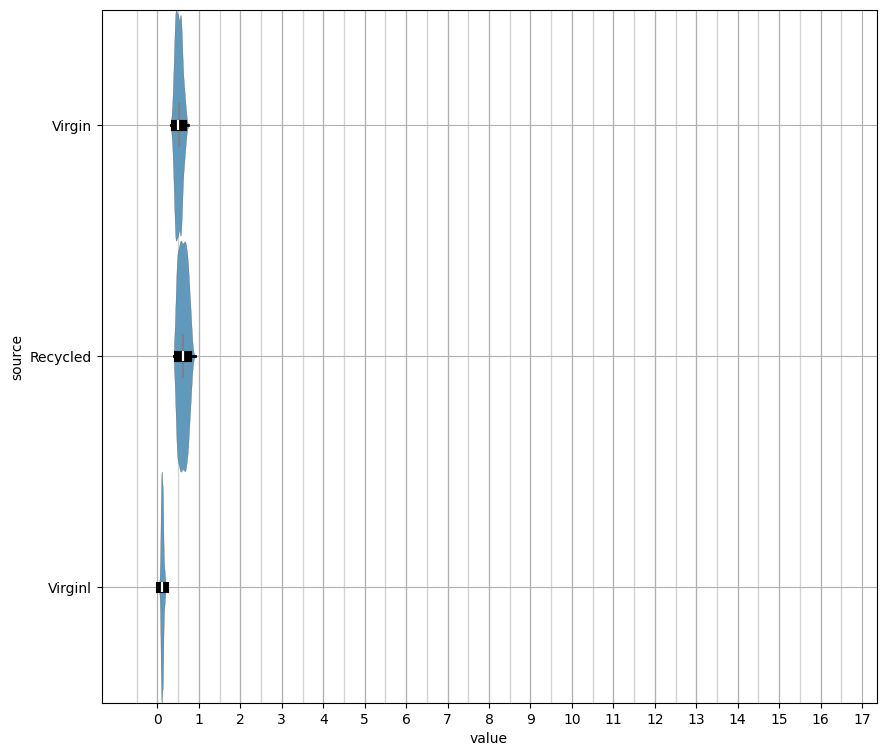

,Object,Uncertainty index,min,max,mean,median,diff_min,diff_max
0,Virgin,0.820766,0.319306,0.736339,0.508101,0.504673,0.188795,-0.228237
1,Recycled,0.812518,0.396705,0.895314,0.613659,0.612136,0.216954,-0.281655


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

         
# Set the figure size
fig =plt.figure(figsize=(10, 9))

# Define the range for vertical lines (from min to max x-values)
x_min = -1
x_max = 17
step = 0.5  # Interval between vertical lines

#plot mean on the graph
marker_size = 1000
plt.scatter(df['value'], df.index, marker='|', s=marker_size, color='grey', label='Mean',zorder=2)


# Plot vertical lines at 0.5 intervals
for x in np.arange(x_min + step, x_max, step):
    plt.axvline(x, color="lightgrey", linestyle="-", linewidth=1, zorder=0,)
    
density = 18
x = np.linspace(0, 17, density, endpoint=True)
plt.xticks(x,zorder=0)
# plt.axvline(0, c='k', alpha=0.5)

# Create a box plot with 'target' on the y-axis and 'value' on the x-axis
custom_palette = ["#529dcb", 
                  "#529dcb", 
                  "#529dcb",
                  "#529dcb",
                  "#ff2727",
                 "#ff2727",
                 "#935eaa",
                 "#935eaa",
                 "#935eaa",
                 "#935eaa",
                 "#935eaa",
                 "#935eaa",
                 "#78508a",
                 "#78508a",
                 "#78508a",
                 "#78508a",
                 "#78508a",
                 "#78508a",
                 "lightgrey",]
sns.violinplot(
    x="value",
    y="source",
    width=1,
   # hue= "target",
    palette=custom_palette,
    data=consumed_products,
    linewidth=0.2,
   # hue="target",
    density_norm="width",
    orient="h",
    inner_kws=dict(box_width=8, whis_width=2, color="black"),
    inner="box",
    cut=0,
    zorder=1,
)

# Set the title of the plot
plt.title("")

# Calculate the difference ratio for each unique 'target'
difference_ratios = []  # List to store the ratios

# Group the data by 'target'
grouped = consumed_products.groupby("target")

for name, group in grouped:
    data = group["value"]
    k = 1.5

    # Calculate quartiles and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Exclude outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    # Calculate minimum and maximum within the non-outlier range
    min_non_outlier = np.min(filtered_data)
    max_non_outlier = np.max(filtered_data)
    
    mean_val = group["value"].mean()
    median_val = group["value"].median()
    Diff_min =  mean_val - min_non_outlier
    Diff_max =  mean_val - max_non_outlier

    difference_ratio = (max_non_outlier - min_non_outlier) / mean_val

    difference_ratios.append((name, difference_ratio,min_non_outlier,max_non_outlier, mean_val,median_val, Diff_min, Diff_max) )  # Store the target name and ratio
    
    
difference_ratios
plt.grid(True)

plt.show()

difference_ratio_df = pd.DataFrame(difference_ratios, columns=['Object', 'Uncertainty index', 'min', 'max', 'mean', 'median', 'diff_min', 'diff_max'])
difference_ratio_df


In [9]:
# Sort the DataFrame by the 'Value' column in descending order
df = difference_ratio_df .sort_values(by='Uncertainty index', ascending=False)
df= df.set_index('Object')


# Create a gradient color map for the 'Value' column
def gradient_color(val):
    max_val = df['Uncertainty index'].max()
    min_val = df['Uncertainty index'].min()
    normalized_value = (val - min_val) / (max_val - min_val)
    r = int(255 * (1 - normalized_value))
    return f'background-color: rgba(255, {r}, 2, 0.5)'


styled_df = df.style.applymap(lambda x: gradient_color(x), subset=['Uncertainty index'])

# Display the styled DataFrame

styled_df

,Uncertainty index,min,max,mean,median,diff_min,diff_max
Object,,,,,,,
Virgin,0.820766,0.319306,0.736339,0.508101,0.504673,0.188795,-0.228237
Recycled,0.812518,0.396705,0.895314,0.613659,0.612136,0.216954,-0.281655


In [10]:
# Specify the file path along with the file name
file_path = r'C:/Users\rla44/OneDrive - University of Bath\MFA graphs/sankey_diagram_3102023'


# Save the plot with the specified file path
fig.savefig(file_path, format='pdf')

# Optionally, specify DPI for higher quality
# plt.savefig(file_path, format='pdf', dpi=300)